In [1]:
%matplotlib inline
import numpy as np
import tensorflow as tf
import pandas as pd
import matplotlib.pyplot as plt
import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
from os import listdir
from os.path import join
from sklearn import metrics
init_notebook_mode()

In [2]:
def visualisation():
    plt.plot(y_test[:,0],label='Actual')
    plt.plot(y_pred[:,0],label='Forecast')
    plt.legend(loc="upper left")
    return plt.show

In [3]:
def data_preparation(data,time_wind,batch_size=1,output=1):
    data_train=data[:901]
    x_train=[]
    for i in range((len(data_train)-1)-(time_wind-1)):
        x_train.append(data_train[i:(i+time_wind)])
    x_train=np.array(x_train)
    x_batches=x_train.reshape(-1,batch_size,time_wind)
    y_train=data_train[time_wind:len(data_train)]#+3]
    y_batches=y_train.reshape(-1,batch_size,output)
    data_test=data[902:]
    x_t=[]
    for i in range((len(data_test)-1)-(time_wind-1)):
        x_t.append(data_test[i:(i+time_wind)])
    x_t=np.array(x_t)
    x_test=x_t.reshape(-1,batch_size,time_wind)
    y_t=data_test[time_wind:len(data_test)]
    y_test=y_t.reshape(-1,batch_size,output)
    return x_batches, y_batches, x_test, y_test

In [4]:
def run_graph(epochs,time_wind,hidden=150,learning_rat=0.0065,output=1,batch_size=1):
    tf.reset_default_graph()
    X=tf.placeholder(tf.float32,[None,batch_size,time_wind])
    Y=tf.placeholder(tf.float32,[None,batch_size,output])
    tf.set_random_seed(1)
    basic_cell=tf.contrib.rnn.BasicRNNCell(num_units=hidden)#,activation=tf.nn.relu)
    rnn_output, states=tf.nn.dynamic_rnn(basic_cell,X,dtype=tf.float32)
    stacked_rnn_output=tf.reshape(rnn_output,[-1,hidden])
    stacked_outputs=tf.layers.dense(stacked_rnn_output,output)
    outputs=tf.reshape(stacked_outputs,[-1,batch_size,output])
    loss=tf.reduce_mean(tf.squared_difference(outputs, Y))
    optimizer=tf.train.AdamOptimizer(learning_rate=learning_rat)
    training_op=optimizer.minimize(loss)
    
    init=tf.global_variables_initializer()
    with tf.Session() as sess:
        init.run()
        for ep in range(epochs):
            sess.run(training_op,feed_dict={X: x_batches, Y: y_batches})
            if ep % 100 == 0:
                mse=loss.eval(feed_dict={X: x_batches, Y: y_batches})
                #print(ep,"\tMSE:",mse)
        y_pred=sess.run(outputs,feed_dict={X:x_test})
        mse_test=loss.eval(feed_dict={X:x_test,Y:y_test})
    #NMSE=(mse/len(x_train))/np.var(x_train)
    #NMSE_test=(mse_test/len(x_test.reshape(-1)))/np.var(x_test.reshape(-1))
        #print(mse)
        #print(mse_test)
    sess.close() 
    return mse_test, y_pred

In [5]:
def generate_data(mu=0,sigma=0.3):
    t=np.arange(0,10,0.01)
    s = np.random.normal(mu, sigma, 1000)
    x=(np.sin(2*np.pi*t)+s)
    return x
x=generate_data()

In [6]:
#Naive model
np.random.seed(1)
x_batches, y_batches, x_test, y_test=data_preparation(x,1)
x_t1=y_test[:,0][:96]
x_t=y_test[:,0][1:]
print(metrics.mean_squared_error(x_t,x_t1))

0.221695464157


0 	MSE: 0.816356
100 	MSE: 0.309225
200 	MSE: 0.177362
300 	MSE: 0.162681
400 	MSE: 0.162078
500 	MSE: 0.161953
600 	MSE: 0.161816
700 	MSE: 0.161662
800 	MSE: 0.161491
900 	MSE: 0.161303
1000 	MSE: 0.161096
1100 	MSE: 0.160872
1200 	MSE: 0.16063
1300 	MSE: 0.160369
1400 	MSE: 0.160089
1500 	MSE: 0.159792
1600 	MSE: 0.159477
1700 	MSE: 0.159145
1800 	MSE: 0.158797
1900 	MSE: 0.158434
0.158434
0.130628


<function matplotlib.pyplot.show>

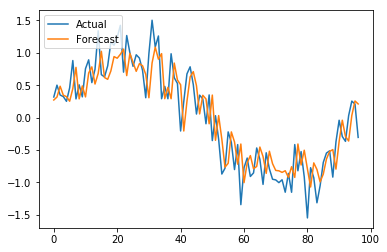

In [42]:
x_batches, y_batches, x_test, y_test=data_preparation(x,1)
y_pred=run_graph(2000,1,hidden=10,learning_rat=0.001)
visualisation()

0 	MSE: 0.185747
100 	MSE: 0.161374
200 	MSE: 0.160778
300 	MSE: 0.159995
400 	MSE: 0.159044
500 	MSE: 0.15795
600 	MSE: 0.156744
700 	MSE: 0.155474
800 	MSE: 0.154208
900 	MSE: 0.15304
1000 	MSE: 0.15205
1100 	MSE: 0.151283
1200 	MSE: 0.150751
1300 	MSE: 0.150419
1400 	MSE: 0.150217
1500 	MSE: 0.150076
1600 	MSE: 0.149962
1700 	MSE: 0.149867
1800 	MSE: 0.149787
1900 	MSE: 0.14972
0.14972
0.149557
0 	MSE: 0.922265
100 	MSE: 0.419202
200 	MSE: 0.209625
300 	MSE: 0.166988
400 	MSE: 0.164003
500 	MSE: 0.163839
600 	MSE: 0.163727
700 	MSE: 0.163602
800 	MSE: 0.16346
900 	MSE: 0.1633
1000 	MSE: 0.16312
1100 	MSE: 0.162918
1200 	MSE: 0.162692
1300 	MSE: 0.162442
1400 	MSE: 0.162165
1500 	MSE: 0.161862
1600 	MSE: 0.161531
1700 	MSE: 0.161173
1800 	MSE: 0.160788
1900 	MSE: 0.160377
0.160377
0.132483
0 	MSE: 0.3822
100 	MSE: 0.173003
200 	MSE: 0.165668
300 	MSE: 0.165536
400 	MSE: 0.165384
500 	MSE: 0.165209
600 	MSE: 0.16501
700 	MSE: 0.16479
800 	MSE: 0.164549
900 	MSE: 0.164289
1000 	MSE: 0.

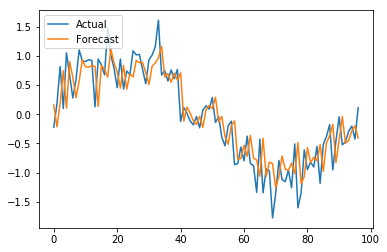

In [61]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),1)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(2000,1,hidden=10,learning_rat=0.001)
    mse.append(mse_test)
visualisation()
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))

0 	MSE: 1.23386
100 	MSE: 0.16028
200 	MSE: 0.157893
300 	MSE: 0.155196
400 	MSE: 0.153211
500 	MSE: 0.1522
600 	MSE: 0.151702
700 	MSE: 0.151365
800 	MSE: 0.151066
900 	MSE: 0.15076
1000 	MSE: 0.150426
1100 	MSE: 0.150063
1200 	MSE: 0.149688
1300 	MSE: 0.149335
1400 	MSE: 0.149039
1500 	MSE: 0.148817
1600 	MSE: 0.148665
1700 	MSE: 0.148567
1800 	MSE: 0.148502
1900 	MSE: 0.148458
0.148458
0.153925
0 	MSE: 0.758604
100 	MSE: 0.159954
200 	MSE: 0.158752
300 	MSE: 0.157602
400 	MSE: 0.156821
500 	MSE: 0.156426
600 	MSE: 0.156248
700 	MSE: 0.156146
800 	MSE: 0.156063
900 	MSE: 0.15599
1000 	MSE: 0.155928
1100 	MSE: 0.155878
1200 	MSE: 0.15584
1300 	MSE: 0.155808
1400 	MSE: 0.15578
1500 	MSE: 0.155753
1600 	MSE: 0.155727
1700 	MSE: 0.155702
1800 	MSE: 0.155676
1900 	MSE: 0.155651
0.155651
0.126783
0 	MSE: 0.402191
100 	MSE: 0.166447
200 	MSE: 0.164143
300 	MSE: 0.161117
400 	MSE: 0.159788
500 	MSE: 0.159645
600 	MSE: 0.159578
700 	MSE: 0.159513
800 	MSE: 0.159445
900 	MSE: 0.159377
1000 	MS

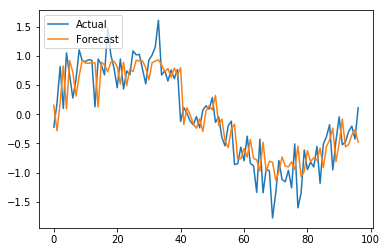

In [62]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),1)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(2000,1,hidden=10,learning_rat=0.01)
    mse.append(mse_test)
visualisation()
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))

0 	MSE: 0.368867
100 	MSE: 0.151385
200 	MSE: 0.150952
300 	MSE: 0.150597
400 	MSE: 0.150318
500 	MSE: 0.150207
600 	MSE: 0.149553
700 	MSE: 0.148836
800 	MSE: 0.148627
900 	MSE: 0.14846
1000 	MSE: 0.148342
1100 	MSE: 0.14825
1200 	MSE: 0.148172
1300 	MSE: 0.148098
1400 	MSE: 0.148038
1500 	MSE: 0.147951
1600 	MSE: 0.147871
1700 	MSE: 0.14779
1800 	MSE: 0.149716
1900 	MSE: 0.147669
0.147669
0.156066
0 	MSE: 0.454448
100 	MSE: 0.156367
200 	MSE: 0.156277
300 	MSE: 0.156059
400 	MSE: 0.155808
500 	MSE: 0.155723
600 	MSE: 0.155675
700 	MSE: 0.155641
800 	MSE: 0.155617
900 	MSE: 0.155615
1000 	MSE: 0.155585
1100 	MSE: 0.155565
1200 	MSE: 0.155539
1300 	MSE: 0.155536
1400 	MSE: 0.155495
1500 	MSE: 0.155459
1600 	MSE: 0.15543
1700 	MSE: 0.155431
1800 	MSE: 0.155408
1900 	MSE: 0.155397
0.155397
0.129408
0 	MSE: 0.398967
100 	MSE: 0.159639
200 	MSE: 0.159597
300 	MSE: 0.159568
400 	MSE: 0.159544
500 	MSE: 0.159523
600 	MSE: 0.159506
700 	MSE: 0.159492
800 	MSE: 0.159479
900 	MSE: 0.159468
1000

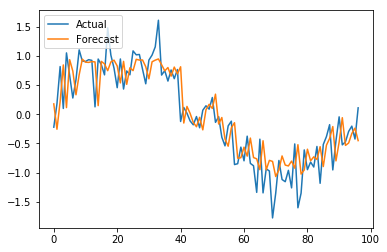

In [63]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),1)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(2000,1,hidden=10,learning_rat=0.1)
    mse.append(mse_test)
visualisation()
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))

0 	MSE: 3.75195
100 	MSE: 0.151711
200 	MSE: 0.150011
300 	MSE: 0.148939
400 	MSE: 0.148319
500 	MSE: 0.148099
600 	MSE: 0.147963
700 	MSE: 0.147859
800 	MSE: 0.147767
900 	MSE: 0.147681
1000 	MSE: 0.1476
1100 	MSE: 0.147523
1200 	MSE: 0.172087
1300 	MSE: 0.14757
1400 	MSE: 0.147502
1500 	MSE: 0.147454
1600 	MSE: 0.147414
1700 	MSE: 0.14738
1800 	MSE: 0.147351
1900 	MSE: 0.157386
0.157386
0.15494
0 	MSE: 1.22839
100 	MSE: 0.156688
200 	MSE: 0.156183
300 	MSE: 0.155505
400 	MSE: 0.15548
500 	MSE: 0.15548
600 	MSE: 0.155388
700 	MSE: 0.155369
800 	MSE: 0.15536
900 	MSE: 0.157384
1000 	MSE: 0.155402
1100 	MSE: 0.155436
1200 	MSE: 0.155396
1300 	MSE: 0.155381
1400 	MSE: 0.155369
1500 	MSE: 0.155358
1600 	MSE: 0.163278
1700 	MSE: 0.155404
1800 	MSE: 0.155379
1900 	MSE: 0.155427
0.155427
0.12903
0 	MSE: 1.91148
100 	MSE: 0.15947
200 	MSE: 0.159103
300 	MSE: 0.158995
400 	MSE: 0.158958
500 	MSE: 0.15893
600 	MSE: 0.158905
700 	MSE: 0.158879
800 	MSE: 0.158852
900 	MSE: 0.158824
1000 	MSE: 0.1

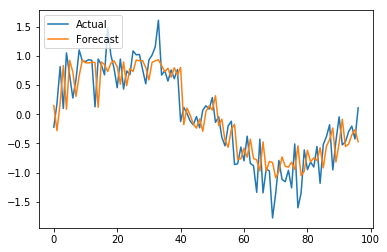

In [64]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),1)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(2000,1,hidden=10,learning_rat=0.3)
    mse.append(mse_test)
visualisation()
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))

0 	MSE: 1.56658
100 	MSE: 0.149332
200 	MSE: 0.148827
300 	MSE: 0.148583
400 	MSE: 0.14835
500 	MSE: 0.148128
600 	MSE: 0.147934
700 	MSE: 0.147785
800 	MSE: 0.147635
900 	MSE: 0.147522
1000 	MSE: 0.147463
1100 	MSE: 0.147411
1200 	MSE: 0.147362
1300 	MSE: 0.147314
1400 	MSE: 0.147257
1500 	MSE: 0.148607
1600 	MSE: 0.147299
1700 	MSE: 0.147252
1800 	MSE: 0.147217
1900 	MSE: 0.147924
0.147924
0.154782
0 	MSE: 9.05648
100 	MSE: 0.155564
200 	MSE: 0.155449
300 	MSE: 0.155416
400 	MSE: 0.155404
500 	MSE: 0.978485
600 	MSE: 0.155377
700 	MSE: 0.155299
800 	MSE: 0.155236
900 	MSE: 0.155194
1000 	MSE: 0.155154
1100 	MSE: 0.155112
1200 	MSE: 0.155065
1300 	MSE: 0.155007
1400 	MSE: 0.154933
1500 	MSE: 0.154845
1600 	MSE: 0.155228
1700 	MSE: 0.154529
1800 	MSE: 0.154423
1900 	MSE: 0.154298
0.154298
0.158795
0 	MSE: 1.81301
100 	MSE: 0.159154
200 	MSE: 0.159067
300 	MSE: 0.159047
400 	MSE: 0.399969
500 	MSE: 0.158979
600 	MSE: 0.158876
700 	MSE: 0.158821
800 	MSE: 0.158783
900 	MSE: 0.158752
1000

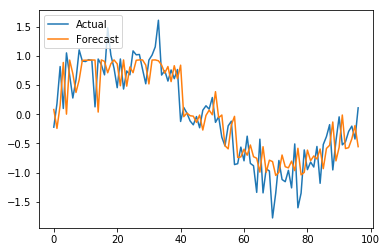

In [65]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),1)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(2000,1,hidden=10,learning_rat=0.5)
    mse.append(mse_test)
visualisation()
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))

0 	MSE: 0.695748
100 	MSE: 0.630033
200 	MSE: 0.570744
300 	MSE: 0.517023
400 	MSE: 0.468397
500 	MSE: 0.424447
600 	MSE: 0.384866
700 	MSE: 0.349447
800 	MSE: 0.318022
900 	MSE: 0.290416
1000 	MSE: 0.266433
1100 	MSE: 0.24585
1200 	MSE: 0.228417
1300 	MSE: 0.213864
1400 	MSE: 0.201902
1500 	MSE: 0.192234
1600 	MSE: 0.18456
1700 	MSE: 0.178588
1800 	MSE: 0.174037
1900 	MSE: 0.170646
0.170646
0.159983
0 	MSE: 0.296857
100 	MSE: 0.264943
200 	MSE: 0.238679
300 	MSE: 0.217671
400 	MSE: 0.2014
500 	MSE: 0.189254
600 	MSE: 0.180559
700 	MSE: 0.174621
800 	MSE: 0.170771
900 	MSE: 0.16841
1000 	MSE: 0.167045
1100 	MSE: 0.166303
1200 	MSE: 0.165922
1300 	MSE: 0.165735
1400 	MSE: 0.165646
1500 	MSE: 0.165601
1600 	MSE: 0.165576
1700 	MSE: 0.165557
1800 	MSE: 0.165541
1900 	MSE: 0.165525
0.165525
0.140548
0 	MSE: 1.12566
100 	MSE: 1.0298
200 	MSE: 0.94274
300 	MSE: 0.863455
400 	MSE: 0.791238
500 	MSE: 0.725432
600 	MSE: 0.66545
700 	MSE: 0.610827
800 	MSE: 0.561153
900 	MSE: 0.516044
1000 	MSE:

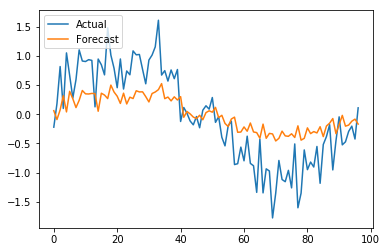

In [66]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),1)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(2000,1,hidden=10,learning_rat=0.0001)
    mse.append(mse_test)
visualisation()
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))

0 	MSE: 1.42776
100 	MSE: 0.159451
200 	MSE: 0.157855
300 	MSE: 0.155931
400 	MSE: 0.154091
500 	MSE: 0.152733
600 	MSE: 0.151954
700 	MSE: 0.151578
800 	MSE: 0.151392
900 	MSE: 0.151274
0.151274
0.147967
0 	MSE: 1.02364
100 	MSE: 0.16124
200 	MSE: 0.160214
300 	MSE: 0.158987
400 	MSE: 0.157836
500 	MSE: 0.156996
600 	MSE: 0.156518
700 	MSE: 0.156297
800 	MSE: 0.156204
900 	MSE: 0.156163
0.156163
0.125464
0 	MSE: 0.589706
100 	MSE: 0.166826
200 	MSE: 0.165211
300 	MSE: 0.163122
400 	MSE: 0.161147
500 	MSE: 0.160014
600 	MSE: 0.159673
700 	MSE: 0.159609
800 	MSE: 0.159591
900 	MSE: 0.159576
0.159576
0.154333
0 	MSE: 0.245222
100 	MSE: 0.165525
200 	MSE: 0.162134
300 	MSE: 0.160185
400 	MSE: 0.159798
500 	MSE: 0.159601
600 	MSE: 0.159466
700 	MSE: 0.159432
800 	MSE: 0.159353
900 	MSE: 0.159337
0.159337
0.170513
0 	MSE: 0.440035
100 	MSE: 0.152307
200 	MSE: 0.151072
300 	MSE: 0.148466
400 	MSE: 0.143817
500 	MSE: 0.139458
600 	MSE: 0.138243
700 	MSE: 0.138161
800 	MSE: 0.138155
900 	MSE: 

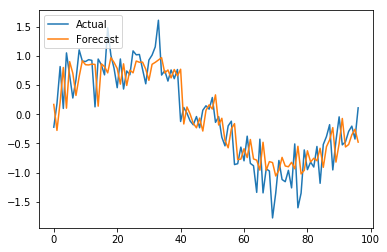

In [67]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),1)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,1,hidden=10,learning_rat=0.01)
    mse.append(mse_test)
visualisation()
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))

0 	MSE: 0.5755
100 	MSE: 0.162156
200 	MSE: 0.159375
300 	MSE: 0.15541
400 	MSE: 0.152218
500 	MSE: 0.151068
600 	MSE: 0.150492
700 	MSE: 0.149976
800 	MSE: 0.149552
900 	MSE: 0.14921
1000 	MSE: 0.148984
1100 	MSE: 0.148831
1200 	MSE: 0.148731
1300 	MSE: 0.148659
1400 	MSE: 0.148619
1500 	MSE: 0.148564
1600 	MSE: 0.14853
1700 	MSE: 0.148501
1800 	MSE: 0.148475
1900 	MSE: 0.148451
2000 	MSE: 0.148428
2100 	MSE: 0.148406
2200 	MSE: 0.148389
2300 	MSE: 0.148361
2400 	MSE: 0.148336
2500 	MSE: 0.14837
2600 	MSE: 0.148283
2700 	MSE: 0.148254
2800 	MSE: 0.148223
2900 	MSE: 0.148194
0.148194
0.15486
0 	MSE: 1.22723
100 	MSE: 0.161943
200 	MSE: 0.160891
300 	MSE: 0.159601
400 	MSE: 0.158303
500 	MSE: 0.157282
600 	MSE: 0.156666
700 	MSE: 0.156371
800 	MSE: 0.156239
900 	MSE: 0.156164
1000 	MSE: 0.156108
1100 	MSE: 0.156063
1200 	MSE: 0.156025
1300 	MSE: 0.155995
1400 	MSE: 0.155971
1500 	MSE: 0.155952
1600 	MSE: 0.155937
1700 	MSE: 0.155922
1800 	MSE: 0.155927
1900 	MSE: 0.155892
2000 	MSE: 0.1

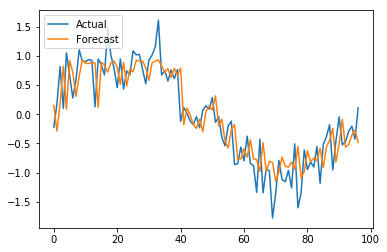

In [68]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),1)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(3000,1,hidden=10,learning_rat=0.01)
    mse.append(mse_test)
visualisation()
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))

0 	MSE: 0.276871
100 	MSE: 0.15622
200 	MSE: 0.152405
300 	MSE: 0.150865
400 	MSE: 0.150645
0.150645
0.14836
0 	MSE: 0.551259
100 	MSE: 0.162076
200 	MSE: 0.160081
300 	MSE: 0.158018
400 	MSE: 0.156778
0.156778
0.126304
0 	MSE: 0.540893
100 	MSE: 0.165372
200 	MSE: 0.163789
300 	MSE: 0.161891
400 	MSE: 0.160416
0.160416
0.155035
0 	MSE: 0.347661
100 	MSE: 0.168393
200 	MSE: 0.166338
300 	MSE: 0.161727
400 	MSE: 0.159832
0.159832
0.170521
0 	MSE: 1.05437
100 	MSE: 0.147237
200 	MSE: 0.145961
300 	MSE: 0.144038
400 	MSE: 0.141668
0.141668
0.125324
0 	MSE: 0.167122
100 	MSE: 0.151392
200 	MSE: 0.151248
300 	MSE: 0.15112
400 	MSE: 0.150993
0.150993
0.104215
0 	MSE: 0.661356
100 	MSE: 0.149957
200 	MSE: 0.148349
300 	MSE: 0.145796
400 	MSE: 0.143132
0.143132
0.135134
0 	MSE: 0.22447
100 	MSE: 0.153913
200 	MSE: 0.151654
300 	MSE: 0.149868
400 	MSE: 0.149396
0.149396
0.0978144
0 	MSE: 0.932095
100 	MSE: 0.176839
200 	MSE: 0.175306
300 	MSE: 0.173298
400 	MSE: 0.171477
0.171477
0.122212
0 	MS

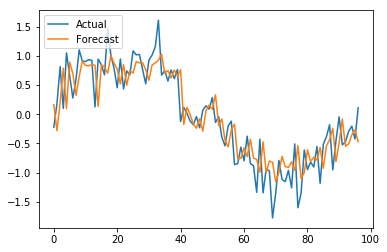

In [69]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),1)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(500,1,hidden=10,learning_rat=0.01)
    mse.append(mse_test)
visualisation()
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))

0 	MSE: 1.22782
100 	MSE: 0.557914
200 	MSE: 0.200074
300 	MSE: 0.156723
400 	MSE: 0.156633
0.156633
0.125599
0 	MSE: 0.168778
100 	MSE: 0.164487
200 	MSE: 0.164486
300 	MSE: 0.164486
400 	MSE: 0.164486
0.164486
0.133958
0 	MSE: 0.151904
100 	MSE: 0.150436
200 	MSE: 0.150436
300 	MSE: 0.150436
400 	MSE: 0.150436
0.150436
0.112556
0 	MSE: 0.217306
100 	MSE: 0.152172
200 	MSE: 0.151302
300 	MSE: 0.150716
400 	MSE: 0.150459
0.150459
0.19586
0 	MSE: 0.707665
100 	MSE: 0.179688
200 	MSE: 0.151599
300 	MSE: 0.151371
400 	MSE: 0.151199
0.151199
0.180022
0 	MSE: 0.746716
100 	MSE: 0.159954
200 	MSE: 0.15952
300 	MSE: 0.159144
400 	MSE: 0.158639
0.158639
0.213667
0 	MSE: 1.80398
100 	MSE: 0.580818
200 	MSE: 0.237056
300 	MSE: 0.155511
400 	MSE: 0.155193
0.155193
0.150609
0 	MSE: 0.250627
100 	MSE: 0.156247
200 	MSE: 0.156196
300 	MSE: 0.15617
400 	MSE: 0.15616
0.15616
0.123193
0 	MSE: 0.369113
100 	MSE: 0.168348
200 	MSE: 0.168209
300 	MSE: 0.168126
400 	MSE: 0.16808
0.16808
0.163572
0 	MSE: 1.

<function matplotlib.pyplot.show>

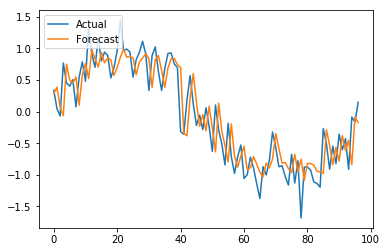

In [87]:
mse_mean=[]
mse_var=[]
for j in range(1,20):
    np.random.seed(j)
    tf.set_random_seed(j)
    mse=[]
    for i in range (10):
        #np.random.seed(i)
        x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),1)
        #tf.set_random_seed(i)
        mse_test,y_pred=run_graph(500,1,hidden=j,learning_rat=0.01)
        mse.append(mse_test)
    mse_mean.append(np.mean(mse))
    mse_var.append(np.var(mse))
    print("Mean of MSE for the model with hidden={} equals{}".format( j, np.mean(mse)))
    print("Variance of MSE for the model with hidden={} equals{}".format(j, np.var(mse)))
visualisation()


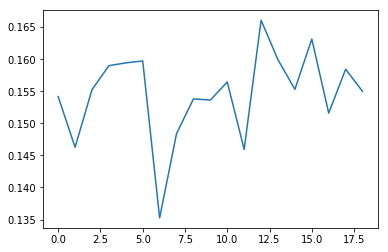

In [88]:
plt.plot(mse_mean)

0 	MSE: 0.165703
100 	MSE: 0.15689
200 	MSE: 0.156437
300 	MSE: 0.156397
400 	MSE: 0.156396
500 	MSE: 0.156396
600 	MSE: 0.156396
700 	MSE: 0.156396
800 	MSE: 0.156396
900 	MSE: 0.156396
0.156396
0.125932
0 	MSE: 0.189377
100 	MSE: 0.164573
200 	MSE: 0.164502
300 	MSE: 0.164487
400 	MSE: 0.164486
500 	MSE: 0.164486
600 	MSE: 0.164486
700 	MSE: 0.164486
800 	MSE: 0.164486
900 	MSE: 0.164486
0.164486
0.133958
0 	MSE: 1.05382
100 	MSE: 0.194095
200 	MSE: 0.159353
300 	MSE: 0.15902
400 	MSE: 0.1586
500 	MSE: 0.158093
600 	MSE: 0.157504
700 	MSE: 0.156842
800 	MSE: 0.156129
900 	MSE: 0.155392
0.155392
0.118912
0 	MSE: 0.167241
100 	MSE: 0.150569
200 	MSE: 0.150368
300 	MSE: 0.150349
400 	MSE: 0.150348
500 	MSE: 0.150348
600 	MSE: 0.150348
700 	MSE: 0.150348
800 	MSE: 0.150348
900 	MSE: 0.150348
0.150348
0.195618
0 	MSE: 0.260299
100 	MSE: 0.155033
200 	MSE: 0.154175
300 	MSE: 0.15316
400 	MSE: 0.152247
500 	MSE: 0.151613
600 	MSE: 0.151254
700 	MSE: 0.15108
800 	MSE: 0.151003
900 	MSE: 0.15

<function matplotlib.pyplot.show>

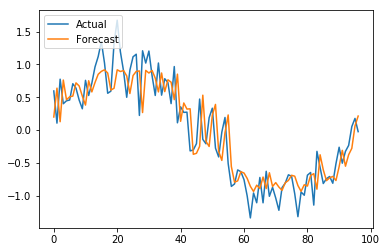

In [89]:
mse_mean=[]
mse_var=[]
for j in range(1,110,10):
    mse=[]
    np.random.seed(j)
    tf.set_random_seed(j)
    for i in range (10):
        #np.random.seed(i)
        x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),1)
        #tf.set_random_seed(i)
        mse_test,y_pred=run_graph(1000,1,hidden=j,learning_rat=0.01)
        mse.append(mse_test)
    mse_mean.append(np.mean(mse))
    mse_var.append(np.var(mse))
    print("Mean of MSE for the model with hidden={} equals{}".format( j, np.mean(mse)))
    print("Variance of MSE for the model with hidden={} equals{}".format(j, np.var(mse)))
visualisation()

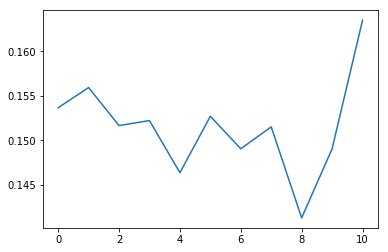

In [90]:
plt.plot(mse_mean)

0 	MSE: 0.925201
100 	MSE: 0.186856
200 	MSE: 0.133144
300 	MSE: 0.124336
400 	MSE: 0.121883
500 	MSE: 0.120929
600 	MSE: 0.120473
700 	MSE: 0.120229
800 	MSE: 0.120088
900 	MSE: 0.120003
0.120003
0.10677
0 	MSE: 0.79152
100 	MSE: 0.273286
200 	MSE: 0.138027
300 	MSE: 0.132525
400 	MSE: 0.129713
500 	MSE: 0.128803
600 	MSE: 0.128445
700 	MSE: 0.128277
800 	MSE: 0.128193
900 	MSE: 0.128149
0.128149
0.119767
0 	MSE: 1.63079
100 	MSE: 0.186541
200 	MSE: 0.148756
300 	MSE: 0.138737
400 	MSE: 0.134235
500 	MSE: 0.131478
600 	MSE: 0.129368
700 	MSE: 0.127499
800 	MSE: 0.125703
900 	MSE: 0.123927
0.123927
0.0913728
0 	MSE: 0.194696
100 	MSE: 0.126253
200 	MSE: 0.12146
300 	MSE: 0.120784
400 	MSE: 0.120768
500 	MSE: 0.120767
600 	MSE: 0.120767
700 	MSE: 0.120767
800 	MSE: 0.120767
900 	MSE: 0.120767
0.120767
0.125946
0 	MSE: 0.272928
100 	MSE: 0.126192
200 	MSE: 0.123155
300 	MSE: 0.122119
400 	MSE: 0.121874
500 	MSE: 0.121828
600 	MSE: 0.121818
700 	MSE: 0.121816
800 	MSE: 0.121815
900 	MSE: 

<function matplotlib.pyplot.show>

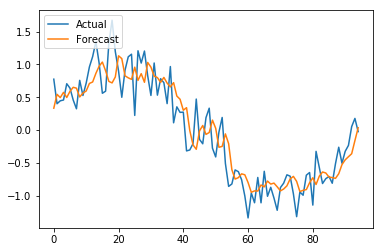

In [91]:
mse_mean=[]
mse_var=[]
for j in range(1,105,5):
    mse=[]
    np.random.seed(j)
    tf.set_random_seed(j)
    for i in range (10):
        #np.random.seed(i)
        x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),3)
        # tf.set_random_seed(i)
        mse_test,y_pred=run_graph(1000,3,hidden=j,learning_rat=0.01)
        mse.append(mse_test)
    mse_mean.append(np.mean(mse))
    mse_var.append(np.var(mse))
    print("Mean of MSE for the model with hidden={} equals{}".format( j, np.mean(mse)))
    print("Variance of MSE for the model with hidden={} equals{}".format(j, np.var(mse)))
visualisation()

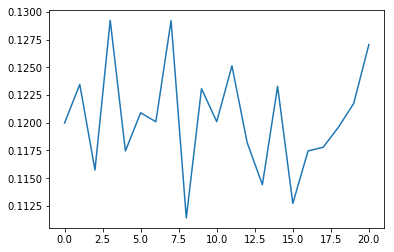

In [92]:
plt.plot(mse_mean)

0 	MSE: 0.626431
100 	MSE: 0.119264
200 	MSE: 0.118289
300 	MSE: 0.117253
400 	MSE: 0.116625
500 	MSE: 0.116336
600 	MSE: 0.116145
700 	MSE: 0.115991
800 	MSE: 0.11587
900 	MSE: 0.115771
0.115771
0.109313
0 	MSE: 0.309092
100 	MSE: 0.121649
200 	MSE: 0.120669
300 	MSE: 0.120041
400 	MSE: 0.11974
500 	MSE: 0.119502
600 	MSE: 0.119281
700 	MSE: 0.119042
800 	MSE: 0.118717
900 	MSE: 0.118267
0.118267
0.108435
0 	MSE: 1.15034
100 	MSE: 0.128018
200 	MSE: 0.127368
300 	MSE: 0.126485
400 	MSE: 0.125693
500 	MSE: 0.125326
600 	MSE: 0.125187
700 	MSE: 0.125091
800 	MSE: 0.125009
900 	MSE: 0.124928
0.124928
0.11376
0 	MSE: 0.212258
100 	MSE: 0.126217
200 	MSE: 0.123514
300 	MSE: 0.122435
400 	MSE: 0.122112
500 	MSE: 0.121513
600 	MSE: 0.120703
700 	MSE: 0.120164
800 	MSE: 0.119934
900 	MSE: 0.119831
0.119831
0.12107
0 	MSE: 0.843369
100 	MSE: 0.11434
200 	MSE: 0.113644
300 	MSE: 0.113069
400 	MSE: 0.112744
500 	MSE: 0.112544
600 	MSE: 0.112374
700 	MSE: 0.112214
800 	MSE: 0.112063
900 	MSE: 0.1

<function matplotlib.pyplot.show>

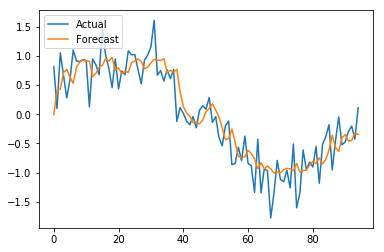

In [31]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),3)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,3,hidden=41,learning_rat=0.01)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

0 	MSE: 0.307108
100 	MSE: 0.118755
200 	MSE: 0.117459
300 	MSE: 0.116578
400 	MSE: 0.116235
500 	MSE: 0.116018
600 	MSE: 0.11587
700 	MSE: 0.115768
800 	MSE: 0.115684
900 	MSE: 0.115597
1000 	MSE: 0.115483
1100 	MSE: 0.115291
1200 	MSE: 0.114984
1300 	MSE: 0.114701
1400 	MSE: 0.114492
1500 	MSE: 0.114256
1600 	MSE: 0.113865
1700 	MSE: 0.113243
1800 	MSE: 0.112661
1900 	MSE: 0.112182
0.112182
0.111619
Mean of MSE for the model:0.11161936074495316
Variance of MSE for the model:0.0
0 	MSE: 0.192176
100 	MSE: 0.121808
200 	MSE: 0.120524
300 	MSE: 0.119774
400 	MSE: 0.119585
500 	MSE: 0.119468
600 	MSE: 0.119377
700 	MSE: 0.119295
800 	MSE: 0.119203
900 	MSE: 0.119077
1000 	MSE: 0.118877
1100 	MSE: 0.118545
1200 	MSE: 0.118043
1300 	MSE: 0.117457
1400 	MSE: 0.116845
1500 	MSE: 0.116273
1600 	MSE: 0.116093
1700 	MSE: 0.115376
1800 	MSE: 0.115859
1900 	MSE: 0.114606
0.114606
0.115757
Mean of MSE for the model:0.11368830502033234
Variance of MSE for the model:4.280514986021444e-06
0 	MSE: 0.2

<function matplotlib.pyplot.show>

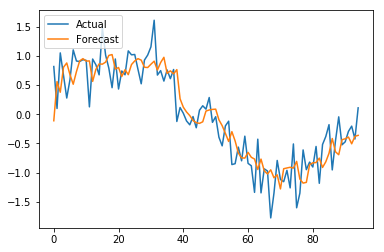

In [8]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),3)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(2000,3,hidden=41,learning_rat=0.01)
    mse.append(mse_test)
    print("Mean of MSE for the model:{}".format(np.mean(mse)))
    print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

0 	MSE: 0.267304
100 	MSE: 0.11797
200 	MSE: 0.117014
300 	MSE: 0.116554
400 	MSE: 0.116272
500 	MSE: 0.116033
600 	MSE: 0.115863
700 	MSE: 0.115762
800 	MSE: 0.115692
900 	MSE: 0.115624
1000 	MSE: 0.115545
1100 	MSE: 0.115442
1200 	MSE: 0.115293
1300 	MSE: 0.115093
1400 	MSE: 0.11483
1500 	MSE: 0.114588
1600 	MSE: 0.1144
1700 	MSE: 0.114083
1800 	MSE: 0.113605
1900 	MSE: 0.112759
2000 	MSE: 0.112118
2100 	MSE: 0.111707
2200 	MSE: 0.11145
2300 	MSE: 0.111242
2400 	MSE: 0.111068
2500 	MSE: 0.110929
2600 	MSE: 0.110804
2700 	MSE: 0.110687
2800 	MSE: 0.110591
2900 	MSE: 0.110496
0.110496
0.114026
0 	MSE: 0.142755
100 	MSE: 0.121484
200 	MSE: 0.119882
300 	MSE: 0.119581
400 	MSE: 0.119453
500 	MSE: 0.119357
600 	MSE: 0.119269
700 	MSE: 0.11917
800 	MSE: 0.119049
900 	MSE: 0.118897
1000 	MSE: 0.118693
1100 	MSE: 0.118687
1200 	MSE: 0.11797
1300 	MSE: 0.116986
1400 	MSE: 0.116147
1500 	MSE: 0.115541
1600 	MSE: 0.115975
1700 	MSE: 0.114703
1800 	MSE: 0.1145
1900 	MSE: 0.114372
2000 	MSE: 0.11

<function matplotlib.pyplot.show>

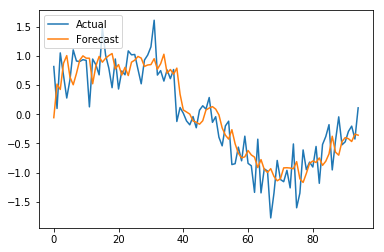

In [32]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),3)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(3000,3,hidden=41,learning_rat=0.01)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

0 	MSE: 0.559606
100 	MSE: 0.119245
200 	MSE: 0.118229
300 	MSE: 0.11714
400 	MSE: 0.116627
0.116627
0.108801
0 	MSE: 0.394531
100 	MSE: 0.122306
200 	MSE: 0.121473
300 	MSE: 0.12048
400 	MSE: 0.119911
0.119911
0.106792
0 	MSE: 0.433629
100 	MSE: 0.128223
200 	MSE: 0.12721
300 	MSE: 0.125901
400 	MSE: 0.125191
0.125191
0.11416
0 	MSE: 0.369068
100 	MSE: 0.126011
200 	MSE: 0.123965
300 	MSE: 0.12264
400 	MSE: 0.12238
0.12238
0.120547
0 	MSE: 0.229229
100 	MSE: 0.115407
200 	MSE: 0.113796
300 	MSE: 0.112769
400 	MSE: 0.112353
0.112353
0.10214
0 	MSE: 0.985237
100 	MSE: 0.123919
200 	MSE: 0.123096
300 	MSE: 0.121902
400 	MSE: 0.120571
0.120571
0.0898925
0 	MSE: 0.379767
100 	MSE: 0.116904
200 	MSE: 0.115837
300 	MSE: 0.114622
400 	MSE: 0.114059
0.114059
0.114467
0 	MSE: 0.536479
100 	MSE: 0.118606
200 	MSE: 0.117809
300 	MSE: 0.117113
400 	MSE: 0.116772
0.116772
0.092604
0 	MSE: 0.570683
100 	MSE: 0.131709
200 	MSE: 0.130937
300 	MSE: 0.130019
400 	MSE: 0.129396
0.129396
0.105568
0 	MSE: 

<function matplotlib.pyplot.show>

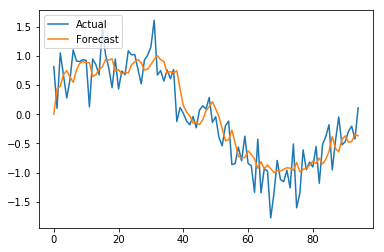

In [33]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),3)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(500,3,hidden=41,learning_rat=0.01)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

0 	MSE: 8.11919
100 	MSE: 0.119377
200 	MSE: 0.115166
300 	MSE: 0.113789
400 	MSE: 0.112932
500 	MSE: 0.112246
600 	MSE: 0.111694
700 	MSE: 0.111283
800 	MSE: 0.110996
900 	MSE: 0.110767
0.110767
0.11664
0 	MSE: 22.6691
100 	MSE: 0.117313
200 	MSE: 0.115783
300 	MSE: 0.115267
400 	MSE: 0.11478
500 	MSE: 0.11418
600 	MSE: 0.1135
700 	MSE: 0.112945
800 	MSE: 0.112555
900 	MSE: 0.11222
0.11222
0.117333
0 	MSE: 46.1709
100 	MSE: 0.12443
200 	MSE: 0.123463
300 	MSE: 0.122981
400 	MSE: 0.122488
500 	MSE: 0.121958
600 	MSE: 0.121338
700 	MSE: 0.120604
800 	MSE: 0.119885
900 	MSE: 0.119344
0.119344
0.117497
0 	MSE: 51.9056
100 	MSE: 0.122431
200 	MSE: 0.119839
300 	MSE: 0.119114
400 	MSE: 0.118639
500 	MSE: 0.118343
600 	MSE: 0.118122
700 	MSE: 0.117911
800 	MSE: 0.117475
900 	MSE: 0.117082
0.117082
0.124617
0 	MSE: 29.6687
100 	MSE: 0.111656
200 	MSE: 0.110125
300 	MSE: 0.109525
400 	MSE: 0.109086
500 	MSE: 0.108772
600 	MSE: 0.10848
700 	MSE: 0.108176
800 	MSE: 0.107839
900 	MSE: 0.107438
0.

<function matplotlib.pyplot.show>

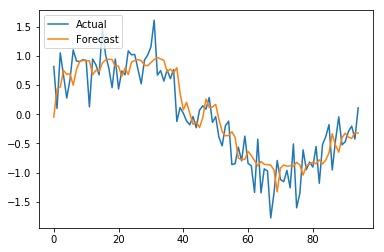

In [34]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),3)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,3,hidden=41,learning_rat=0.5)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

0 	MSE: 7.03016
100 	MSE: 0.117948
200 	MSE: 0.113993
300 	MSE: 0.113055
400 	MSE: 0.112043
500 	MSE: 0.111364
600 	MSE: 0.11096
700 	MSE: 0.110687
800 	MSE: 0.110452
900 	MSE: 0.110208
0.110208
0.114719
Mean of MSE for the model:0.11471904814243317
Variance of MSE for the model:0.0
0 	MSE: 78.748
100 	MSE: 0.118684
200 	MSE: 0.116733
300 	MSE: 0.116255
400 	MSE: 0.115881
500 	MSE: 0.11554
600 	MSE: 0.115224
700 	MSE: 0.114926
800 	MSE: 0.114633
900 	MSE: 0.114342
0.114342
0.116977
Mean of MSE for the model:0.11584798991680145
Variance of MSE for the model:1.2745178992190631e-06
0 	MSE: 44.893
100 	MSE: 0.127698
200 	MSE: 0.124647
300 	MSE: 0.123473
400 	MSE: 0.122534
500 	MSE: 0.121621
600 	MSE: 0.120928
700 	MSE: 0.120418
800 	MSE: 0.119836
900 	MSE: 0.119232
0.119232
0.117885
Mean of MSE for the model:0.11652704328298569
Variance of MSE for the model:1.7719021343509667e-06
0 	MSE: 12.67
100 	MSE: 0.123331
200 	MSE: 0.120744
300 	MSE: 0.119826
400 	MSE: 0.119066
500 	MSE: 0.118458
60

<function matplotlib.pyplot.show>

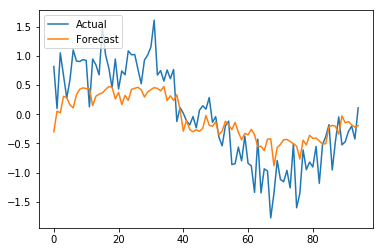

In [22]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),3)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,3,hidden=41,learning_rat=0.5)
    mse.append(mse_test)
    print("Mean of MSE for the model:{}".format(np.mean(mse)))
    print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

0 	MSE: 4.08995
100 	MSE: 0.116761
200 	MSE: 0.116215
300 	MSE: 0.115909
400 	MSE: 0.115746
500 	MSE: 0.115526
600 	MSE: 0.115111
700 	MSE: 0.114309
800 	MSE: 0.113097
900 	MSE: 0.112506
0.112506
0.110438
0 	MSE: 1.22468
100 	MSE: 0.119906
200 	MSE: 0.119697
300 	MSE: 0.119538
400 	MSE: 0.119389
500 	MSE: 0.119226
600 	MSE: 0.118987
700 	MSE: 0.118556
800 	MSE: 0.120753
900 	MSE: 0.117927
0.117927
0.111702
0 	MSE: 3.61011
100 	MSE: 0.125698
200 	MSE: 0.125497
300 	MSE: 0.125365
400 	MSE: 0.125229
500 	MSE: 0.125092
600 	MSE: 0.124989
700 	MSE: 0.124876
800 	MSE: 0.124611
900 	MSE: 0.123596
0.123596
0.115421
0 	MSE: 3.37316
100 	MSE: 0.123486
200 	MSE: 0.122879
300 	MSE: 0.122436
400 	MSE: 0.12192
500 	MSE: 0.121589
600 	MSE: 0.120788
700 	MSE: 0.120026
800 	MSE: 0.119341
900 	MSE: 0.118675
0.118675
0.124214
0 	MSE: 7.08387
100 	MSE: 0.115525
200 	MSE: 0.113038
300 	MSE: 0.111988
400 	MSE: 0.111713
500 	MSE: 0.111532
600 	MSE: 0.111357
700 	MSE: 0.111154
800 	MSE: 0.11094
900 	MSE: 0.11

<function matplotlib.pyplot.show>

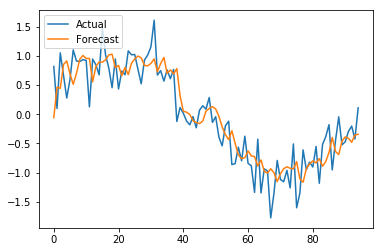

In [35]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),3)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,3,hidden=41,learning_rat=0.1)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

0 	MSE: 0.450361
100 	MSE: 0.116659
200 	MSE: 0.115974
300 	MSE: 0.11529
400 	MSE: 0.114794
500 	MSE: 0.114501
600 	MSE: 0.114403
700 	MSE: 0.113824
800 	MSE: 0.113249
900 	MSE: 0.112885
0.112885
0.112018
0 	MSE: 0.414766
100 	MSE: 0.120051
200 	MSE: 0.119743
300 	MSE: 0.119648
400 	MSE: 0.119561
500 	MSE: 0.119453
600 	MSE: 0.119322
700 	MSE: 0.119149
800 	MSE: 0.118831
900 	MSE: 0.134776
0.134776
0.108558
0 	MSE: 0.495242
100 	MSE: 0.12543
200 	MSE: 0.125253
300 	MSE: 0.125121
400 	MSE: 0.124942
500 	MSE: 0.124767
600 	MSE: 0.124287
700 	MSE: 0.12397
800 	MSE: 0.123838
900 	MSE: 0.123745
0.123745
0.116132
0 	MSE: 1.42255
100 	MSE: 0.12312
200 	MSE: 0.12256
300 	MSE: 0.122462
400 	MSE: 0.122306
500 	MSE: 0.12202
600 	MSE: 0.121727
700 	MSE: 0.121515
800 	MSE: 0.121156
900 	MSE: 0.120478
0.120478
0.121757
0 	MSE: 0.256331
100 	MSE: 0.112721
200 	MSE: 0.112297
300 	MSE: 0.112021
400 	MSE: 0.111837
500 	MSE: 0.111669
600 	MSE: 0.11149
700 	MSE: 0.111285
800 	MSE: 0.111023
900 	MSE: 0.110

<function matplotlib.pyplot.show>

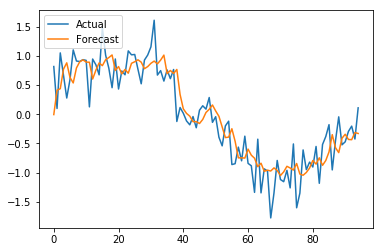

In [36]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),3)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,3,hidden=41,learning_rat=0.05)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

0 	MSE: 0.50117
100 	MSE: 0.118621
200 	MSE: 0.117592
300 	MSE: 0.116806
400 	MSE: 0.116458
500 	MSE: 0.116241
600 	MSE: 0.116045
700 	MSE: 0.115879
800 	MSE: 0.115754
900 	MSE: 0.115658
0.115658
0.10936
0 	MSE: 0.152176
100 	MSE: 0.120337
200 	MSE: 0.11976
300 	MSE: 0.119504
400 	MSE: 0.119351
500 	MSE: 0.119217
600 	MSE: 0.119006
700 	MSE: 0.117983
800 	MSE: 0.116897
900 	MSE: 0.116305
0.116305
0.115011
0 	MSE: 1.45987
100 	MSE: 0.129022
200 	MSE: 0.128659
300 	MSE: 0.128078
400 	MSE: 0.127124
500 	MSE: 0.12595
600 	MSE: 0.125299
700 	MSE: 0.125133
800 	MSE: 0.125055
900 	MSE: 0.124992
0.124992
0.113921
0 	MSE: 0.580346
100 	MSE: 0.125716
200 	MSE: 0.124257
300 	MSE: 0.122962
400 	MSE: 0.122523
500 	MSE: 0.122336
600 	MSE: 0.122132
700 	MSE: 0.121902
800 	MSE: 0.121666
900 	MSE: 0.12142
0.12142
0.120782
0 	MSE: 0.168222
100 	MSE: 0.114076
200 	MSE: 0.112861
300 	MSE: 0.112452
400 	MSE: 0.112225
500 	MSE: 0.11204
600 	MSE: 0.11189
700 	MSE: 0.111759
800 	MSE: 0.111631
900 	MSE: 0.1114

<function matplotlib.pyplot.show>

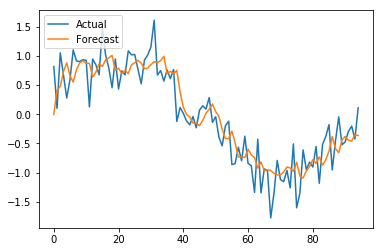

In [37]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),3)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,3,hidden=41,learning_rat=0.01)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

0 	MSE: 0.33036
100 	MSE: 0.119321
200 	MSE: 0.118413
300 	MSE: 0.117387
400 	MSE: 0.116626
500 	MSE: 0.116254
600 	MSE: 0.116054
700 	MSE: 0.115906
800 	MSE: 0.115778
900 	MSE: 0.115658
0.115658
0.109329
0 	MSE: 0.942871
100 	MSE: 0.122553
200 	MSE: 0.122281
300 	MSE: 0.121908
400 	MSE: 0.121399
500 	MSE: 0.12079
600 	MSE: 0.120203
700 	MSE: 0.119681
800 	MSE: 0.119175
900 	MSE: 0.118663
0.118663
0.109323
0 	MSE: 0.455817
100 	MSE: 0.128004
200 	MSE: 0.127374
300 	MSE: 0.126519
400 	MSE: 0.125655
500 	MSE: 0.125139
600 	MSE: 0.124951
700 	MSE: 0.124864
800 	MSE: 0.124794
900 	MSE: 0.124725
0.124725
0.114277
0 	MSE: 0.375136
100 	MSE: 0.127124
200 	MSE: 0.126224
300 	MSE: 0.12473
400 	MSE: 0.123184
500 	MSE: 0.122497
600 	MSE: 0.122207
700 	MSE: 0.121901
800 	MSE: 0.12151
900 	MSE: 0.120983
0.120983
0.12216
0 	MSE: 0.611592
100 	MSE: 0.115815
200 	MSE: 0.115306
300 	MSE: 0.114593
400 	MSE: 0.113816
500 	MSE: 0.1132
600 	MSE: 0.112794
700 	MSE: 0.112504
800 	MSE: 0.112268
900 	MSE: 0.11

<function matplotlib.pyplot.show>

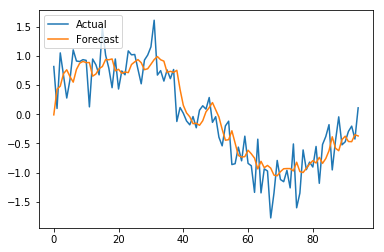

In [38]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),3)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,3,hidden=41,learning_rat=0.005)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

0 	MSE: 0.974874
100 	MSE: 0.132296
200 	MSE: 0.122242
300 	MSE: 0.119521
400 	MSE: 0.11901
500 	MSE: 0.118849
600 	MSE: 0.118716
700 	MSE: 0.118578
800 	MSE: 0.118432
900 	MSE: 0.118277
0.118277
0.108267
0 	MSE: 0.714399
100 	MSE: 0.124203
200 	MSE: 0.12234
300 	MSE: 0.122192
400 	MSE: 0.122101
500 	MSE: 0.121996
600 	MSE: 0.121876
700 	MSE: 0.121741
800 	MSE: 0.121593
900 	MSE: 0.121434
0.121434
0.107526
0 	MSE: 0.667495
100 	MSE: 0.130079
200 	MSE: 0.128865
300 	MSE: 0.128601
400 	MSE: 0.12846
500 	MSE: 0.128305
600 	MSE: 0.128124
700 	MSE: 0.127908
800 	MSE: 0.127647
900 	MSE: 0.12734
0.12734
0.116083
0 	MSE: 0.368251
100 	MSE: 0.129785
200 	MSE: 0.127556
300 	MSE: 0.12732
400 	MSE: 0.127105
500 	MSE: 0.126841
600 	MSE: 0.126489
700 	MSE: 0.125963
800 	MSE: 0.125183
900 	MSE: 0.124302
0.124302
0.123729
0 	MSE: 1.02368
100 	MSE: 0.116418
200 	MSE: 0.115811
300 	MSE: 0.115561
400 	MSE: 0.11544
500 	MSE: 0.115345
600 	MSE: 0.115247
700 	MSE: 0.115139
800 	MSE: 0.115022
900 	MSE: 0.114

<function matplotlib.pyplot.show>

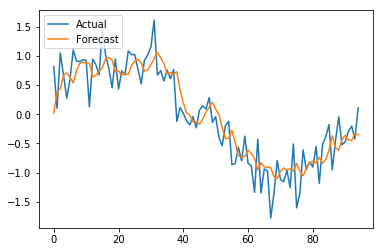

In [39]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),3)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,3,hidden=41,learning_rat=0.001)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

0 	MSE: 1.70208
100 	MSE: 0.217857
200 	MSE: 0.129558
300 	MSE: 0.125654
400 	MSE: 0.123037
500 	MSE: 0.121405
600 	MSE: 0.120472
700 	MSE: 0.119971
800 	MSE: 0.119709
900 	MSE: 0.119566
0.119566
0.109606
0 	MSE: 0.832646
100 	MSE: 0.145787
200 	MSE: 0.128859
300 	MSE: 0.124702
400 	MSE: 0.122742
500 	MSE: 0.121951
600 	MSE: 0.121665
700 	MSE: 0.121555
800 	MSE: 0.121494
900 	MSE: 0.121443
0.121443
0.108085
0 	MSE: 1.18385
100 	MSE: 0.146606
200 	MSE: 0.128744
300 	MSE: 0.128518
400 	MSE: 0.128349
500 	MSE: 0.128227
600 	MSE: 0.128133
700 	MSE: 0.128052
800 	MSE: 0.127976
900 	MSE: 0.127899
0.127899
0.117172
0 	MSE: 0.61433
100 	MSE: 0.142302
200 	MSE: 0.1327
300 	MSE: 0.12843
400 	MSE: 0.126883
500 	MSE: 0.126401
600 	MSE: 0.126226
700 	MSE: 0.126111
800 	MSE: 0.125998
900 	MSE: 0.125877
0.125877
0.124697
0 	MSE: 1.3773
100 	MSE: 0.243733
200 	MSE: 0.119676
300 	MSE: 0.118168
400 	MSE: 0.117224
500 	MSE: 0.116551
600 	MSE: 0.116107
700 	MSE: 0.115832
800 	MSE: 0.115665
900 	MSE: 0.115

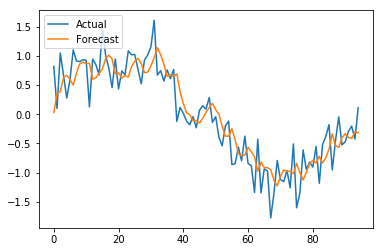

In [40]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),3)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,3,hidden=41,learning_rat=0.0005)
    mse.append(mse_test)
visualisation()
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))


0 	MSE: 0.254621
100 	MSE: 0.14695
200 	MSE: 0.125129
300 	MSE: 0.122516
400 	MSE: 0.121632
500 	MSE: 0.120931
600 	MSE: 0.120362
700 	MSE: 0.119917
800 	MSE: 0.119578
900 	MSE: 0.119327
0.119327
0.109898
0 	MSE: 1.32569
100 	MSE: 0.897424
200 	MSE: 0.599864
300 	MSE: 0.399855
400 	MSE: 0.273238
500 	MSE: 0.199304
600 	MSE: 0.16027
700 	MSE: 0.141846
800 	MSE: 0.133973
900 	MSE: 0.130717
0.130717
0.108802
0 	MSE: 0.307835
100 	MSE: 0.185399
200 	MSE: 0.14395
300 	MSE: 0.134679
400 	MSE: 0.13284
500 	MSE: 0.131954
600 	MSE: 0.131186
700 	MSE: 0.130499
800 	MSE: 0.129901
900 	MSE: 0.129396
0.129396
0.124843
0 	MSE: 0.428221
100 	MSE: 0.256574
200 	MSE: 0.176238
300 	MSE: 0.146503
400 	MSE: 0.137621
500 	MSE: 0.134677
600 	MSE: 0.132985
700 	MSE: 0.131633
800 	MSE: 0.130497
900 	MSE: 0.129554
0.129554
0.130591
0 	MSE: 0.548207
100 	MSE: 0.314062
200 	MSE: 0.19233
300 	MSE: 0.141291
400 	MSE: 0.124953
500 	MSE: 0.120792
600 	MSE: 0.119587
700 	MSE: 0.118919
800 	MSE: 0.11837
900 	MSE: 0.11

<function matplotlib.pyplot.show>

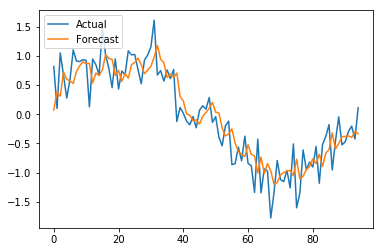

In [41]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),3)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,3,hidden=41,learning_rat=0.0001)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

0 	MSE: 0.648264
100 	MSE: 0.508338
200 	MSE: 0.397742
300 	MSE: 0.312485
400 	MSE: 0.248816
500 	MSE: 0.203021
600 	MSE: 0.171488
700 	MSE: 0.150823
800 	MSE: 0.137997
900 	MSE: 0.130478
0.130478
0.11819
0 	MSE: 1.07078
100 	MSE: 0.869814
200 	MSE: 0.703145
300 	MSE: 0.566016
400 	MSE: 0.454656
500 	MSE: 0.365706
600 	MSE: 0.296063
700 	MSE: 0.242831
800 	MSE: 0.20328
900 	MSE: 0.174838
0.174838
0.153746
0 	MSE: 0.909212
100 	MSE: 0.734916
200 	MSE: 0.592117
300 	MSE: 0.476476
400 	MSE: 0.38424
500 	MSE: 0.312107
600 	MSE: 0.25701
700 	MSE: 0.216068
800 	MSE: 0.186594
900 	MSE: 0.166118
0.166118
0.150964
0 	MSE: 0.293283
100 	MSE: 0.222647
200 	MSE: 0.179362
300 	MSE: 0.1557
400 	MSE: 0.144256
500 	MSE: 0.139233
600 	MSE: 0.136983
700 	MSE: 0.135714
800 	MSE: 0.134739
900 	MSE: 0.133859
0.133859
0.126708
0 	MSE: 0.874871
100 	MSE: 0.696245
200 	MSE: 0.552361
300 	MSE: 0.43753
400 	MSE: 0.347252
500 	MSE: 0.277686
600 	MSE: 0.225465
700 	MSE: 0.187508
800 	MSE: 0.160947
900 	MSE: 0.143

<function matplotlib.pyplot.show>

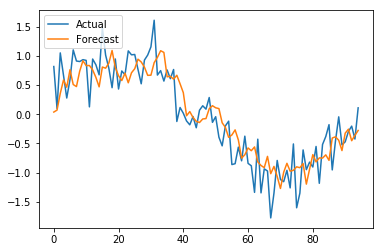

In [42]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),3)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,3,hidden=41,learning_rat=0.00005)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model with hidden=1 equals0.11715580523014069
Variance of MSE for the model with hidden=1 equals0.00029505224665626884
Mean of MSE for the model with hidden=6 equals0.12092721462249756
Variance of MSE for the model with hidden=6 equals0.00028534859302453697
Mean of MSE for the model with hidden=11 equals0.1136740893125534
Variance of MSE for the model with hidden=11 equals0.00012987693480681628
Mean of MSE for the model with hidden=16 equals0.1292470395565033
Variance of MSE for the model with hidden=16 equals0.0005217859288677573
Mean of MSE for the model with hidden=21 equals0.11677557229995728
Variance of MSE for the model with hidden=21 equals0.00027206289814785123
Mean of MSE for the model with hidden=26 equals0.12605348229408264
Variance of MSE for the model with hidden=26 equals0.0002755070454441011
Mean of MSE for the model with hidden=31 equals0.12104227393865585
Variance of MSE for the model with hidden=31 equals0.00024181391927413642
Mean of MSE for the m

<function matplotlib.pyplot.show>

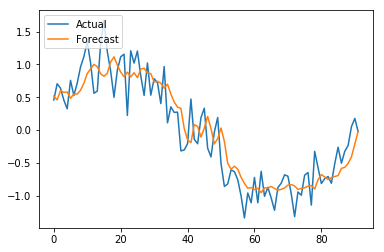

In [51]:
mse_mean=[]
mse_var=[]
for j in range(1,105,5):
    mse=[]
    np.random.seed(j)
    tf.set_random_seed(j)
    for i in range (10):
        #np.random.seed(i)
        x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
        # tf.set_random_seed(i)
        mse_test,y_pred=run_graph(1000,6,hidden=j,learning_rat=0.01)
        mse.append(mse_test)
    mse_mean.append(np.mean(mse))
    mse_var.append(np.var(mse))
    print("Mean of MSE for the model with hidden={} equals{}".format( j, np.mean(mse)))
    print("Variance of MSE for the model with hidden={} equals{}".format(j, np.var(mse)))
visualisation()

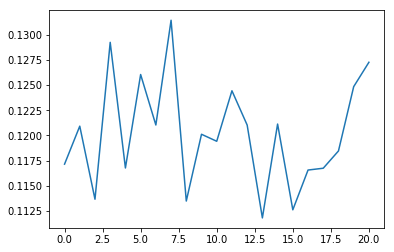

In [53]:
plt.plot(mse_mean)

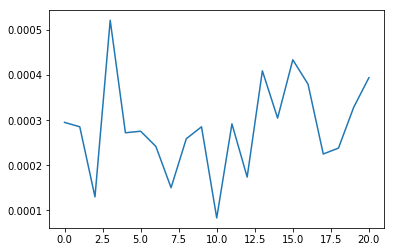

In [52]:
plt.plot(mse_var)

Mean of MSE for the model:0.12213853746652603
Variance of MSE for the model:0.0003731374745257199


<function matplotlib.pyplot.show>

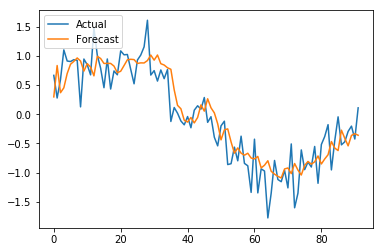

In [7]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,6,hidden=11,learning_rat=0.1)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.12143633514642715
Variance of MSE for the model:0.00031396656413562596


<function matplotlib.pyplot.show>

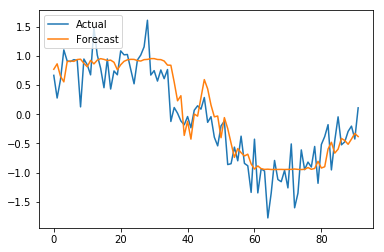

In [8]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,6,hidden=11,learning_rat=0.5)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.1159122958779335
Variance of MSE for the model:0.00012914222315885127


<function matplotlib.pyplot.show>

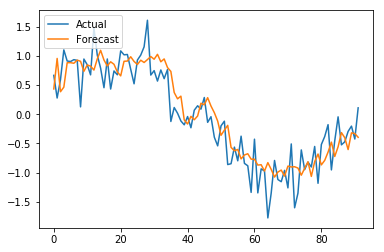

In [9]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,6,hidden=11,learning_rat=0.05)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.10978446155786514
Variance of MSE for the model:0.00011231085227336735


<function matplotlib.pyplot.show>

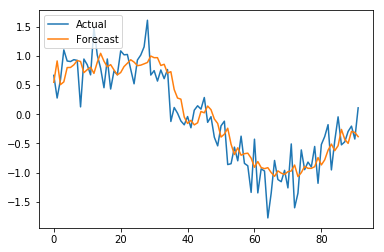

In [10]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,6,hidden=11,learning_rat=0.01)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.10990162938833237
Variance of MSE for the model:0.00012058958236593753


<function matplotlib.pyplot.show>

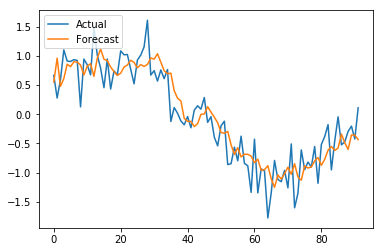

In [11]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,6,hidden=11,learning_rat=0.005)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.10825947672128677
Variance of MSE for the model:0.00012536172289401293


<function matplotlib.pyplot.show>

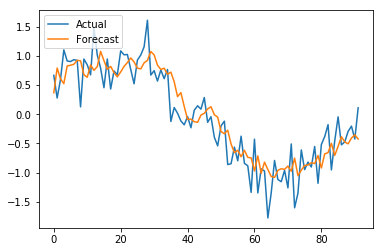

In [12]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,6,hidden=11,learning_rat=0.001)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.10694301128387451
Variance of MSE for the model:0.00010292294609826058


<function matplotlib.pyplot.show>

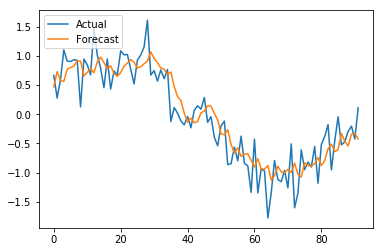

In [13]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,6,hidden=11,learning_rat=0.0005)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.12854242324829102
Variance of MSE for the model:0.0005111451027914882


<function matplotlib.pyplot.show>

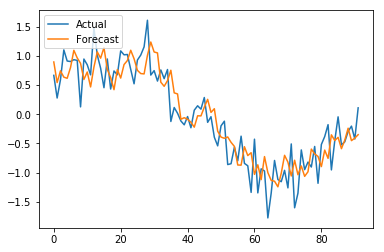

In [14]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,6,hidden=11,learning_rat=0.0001)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.6745592355728149
Variance of MSE for the model:0.7412480115890503


<function matplotlib.pyplot.show>

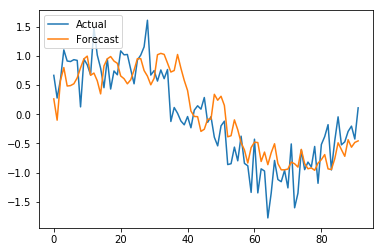

In [15]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(1000,6,hidden=11,learning_rat=0.00001)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.10855109989643097
Variance of MSE for the model:0.00013677761307917535


<function matplotlib.pyplot.show>

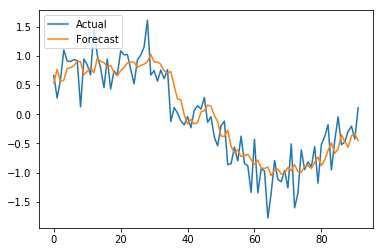

In [16]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(500,6,hidden=11,learning_rat=0.01)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.11743602901697159
Variance of MSE for the model:0.00013657812087330967


<function matplotlib.pyplot.show>

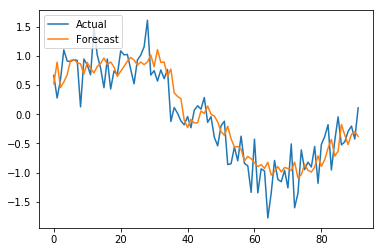

In [17]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(2000,6,hidden=11,learning_rat=0.01)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.12219904363155365
Variance of MSE for the model:0.0001890503044705838


<function matplotlib.pyplot.show>

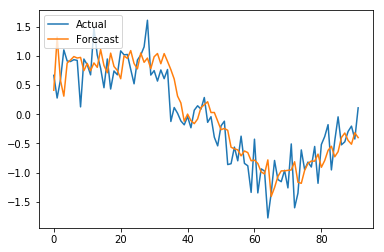

In [18]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(3000,6,hidden=11,learning_rat=0.01)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.10777634382247925
Variance of MSE for the model:0.00012429471826180816


<function matplotlib.pyplot.show>

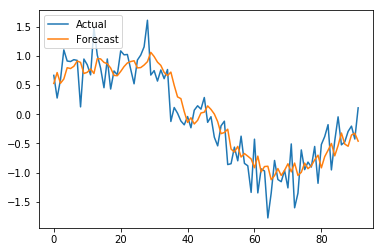

In [6]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(500,6,hidden=11,learning_rat=0.001)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.15831640362739563
Variance of MSE for the model:0.0003542348858900368


<function matplotlib.pyplot.show>

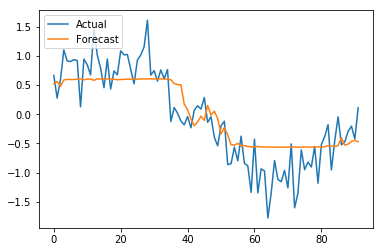

In [7]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(500,6,hidden=1,learning_rat=0.001)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.36984166502952576
Variance of MSE for the model:0.001178303500637412


<function matplotlib.pyplot.show>

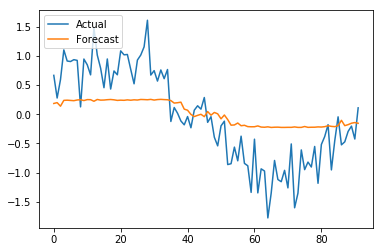

In [8]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(500,6,hidden=1,learning_rat=0.0001)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.10642323642969131
Variance of MSE for the model:0.00011211088713025674


<function matplotlib.pyplot.show>

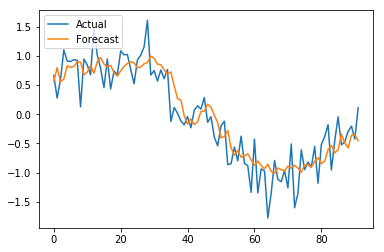

In [9]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(500,6,hidden=1,learning_rat=0.01)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.10609595477581024
Variance of MSE for the model:0.00010494753951206803


<function matplotlib.pyplot.show>

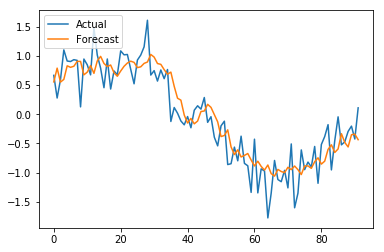

In [10]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),6)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(500,6,hidden=1,learning_rat=0.1)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.10336600244045258
Variance of MSE for the model:0.00013439440226648003


<function matplotlib.pyplot.show>

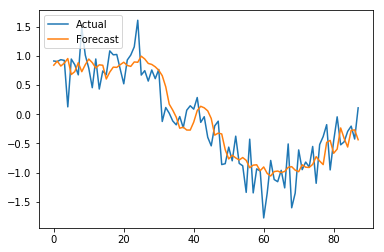

In [11]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),10)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(500,10,hidden=1,learning_rat=0.1)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.10640197992324829
Variance of MSE for the model:0.00021838187240064144


<function matplotlib.pyplot.show>

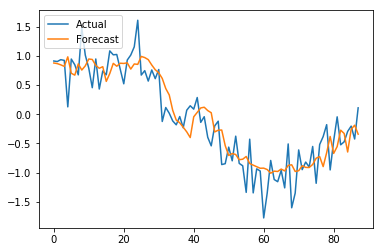

In [12]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),10)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(500,10,hidden=2,learning_rat=0.1)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.10316824913024902
Variance of MSE for the model:0.0001784990163287148


<function matplotlib.pyplot.show>

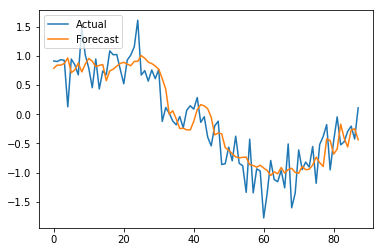

In [13]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),10)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(500,10,hidden=2,learning_rat=0.01)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.1051429957151413
Variance of MSE for the model:0.00016010762192308903


<function matplotlib.pyplot.show>

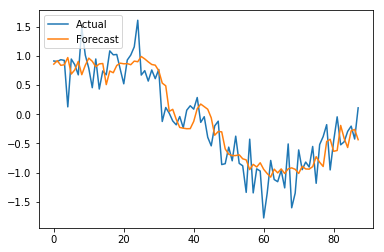

In [14]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),10)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(500,10,hidden=2,learning_rat=0.03)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()

Mean of MSE for the model:0.1045682281255722
Variance of MSE for the model:0.0001725110487313941


<function matplotlib.pyplot.show>

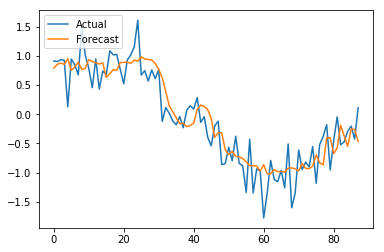

In [16]:
mse=[]
for i in range (10):
    np.random.seed(i)
    x_batches, y_batches, x_test, y_test=data_preparation(generate_data(),10)
    tf.set_random_seed(i)
    mse_test,y_pred=run_graph(500,10,hidden=3,learning_rat=0.01)
    mse.append(mse_test)
print("Mean of MSE for the model:{}".format(np.mean(mse)))
print("Variance of MSE for the model:{}".format(np.var(mse)))
visualisation()